In [3]:
from pathlib import Path
import re
import numpy as np

tsdir = '/home/anton/Documents/Tulane/Research/UKBB/Cypress/ts'

rest1 = dict()
i = 0

for ts in Path(tsdir).iterdir():
    m = re.match('(\d+)_(\d+)_(\d)_0_ts.csv', ts.name)
    if not m:
        continue
    subid = int(m.group(1))
    field = int(m.group(2))
    scannum = int(m.group(3))
    if field != 20227:
        continue
    if scannum != 2:
        continue
    data = np.genfromtxt(str(ts), delimiter=',')
    rest1[subid] = data
    if len(rest1) > 15000:
        break
    i += 1
    if i % 100 == 0:
        print(f'Done {i}')
    
print('Complete')

Done 100
Done 200
Done 300
Done 400
Done 500
Done 600
Done 700
Done 800
Done 900
Done 1000
Done 1100
Done 1200
Done 1300
Done 1400
Done 1500
Done 1600
Done 1700
Done 1800
Done 1900
Done 2000
Done 2100
Done 2200
Done 2300
Done 2400
Done 2500
Done 2600
Done 2700
Done 2800
Done 2900
Done 3000
Done 3100
Done 3200
Done 3300
Done 3400
Done 3500
Done 3600
Done 3700
Done 3800
Done 3900
Done 4000
Done 4100
Done 4200
Done 4300
Done 4400
Done 4500
Done 4600
Done 4700
Done 4800
Done 4900
Done 5000
Done 5100
Done 5200
Done 5300
Done 5400
Done 5500
Done 5600
Done 5700
Done 5800
Done 5900
Done 6000
Done 6100
Done 6200
Done 6300
Done 6400
Done 6500
Done 6600
Done 6700
Done 6800
Done 6900
Done 7000
Done 7100
Done 7200
Done 7300
Done 7400
Done 7500
Done 7600
Done 7700
Done 7800
Done 7900
Done 8000
Done 8100
Done 8200
Done 8300
Done 8400
Done 8500
Done 8600
Done 8700
Done 8800
Done 8900
Done 9000
Done 9100
Done 9200
Done 9300
Done 9400
Done 9500
Done 9600
Done 9700
Done 9800
Done 9900
Done 10000
Done 101

In [4]:
from scipy import signal

def butter_bandpass(cutoff, fs, order=5):
    normal_cutoff = [cutoff[0], cutoff[1]]
    b, a = signal.butter(order, normal_cutoff, btype='band', analog=False, fs=fs)
    return b, a

def butter_bandpass_filter(data, cutoff, fs, order=5):
    b, a = butter_bandpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

tr = 0.735

ps = dict()

a,b = np.triu_indices(264,1)

for sub,ts in rest1.items():
    try:
        ts1 = butter_bandpass_filter(ts, [0.01, 0.15], 1/tr)
        p = np.corrcoef(ts1)
        if np.sum(np.isnan(p)) > 0:
            print(f'Bad sub {sub}')
            continue
        ps[sub] = p[a,b]
        if len(ps) % 100 == 0:
            print(f'Done {len(ps)}')
    except:
        print(f'Bad sub {sub}')

Done 100
Done 200
Done 300
Done 400
Done 500
Done 600
Done 700
Done 800
Done 900
Done 1000
Done 1100
Done 1200


/home/anton/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/anton/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Bad sub 2848783
Done 1300
Done 1400
Bad sub 3360472
Done 1500
Done 1600
Done 1700
Done 1800
Done 1900
Done 2000
Done 2100
Done 2200
Done 2300
Done 2400
Done 2500
Done 2600
Done 2700
Done 2800
Done 2900
Bad sub 3333293
Done 3000
Done 3100
Done 3200
Done 3300
Done 3400
Done 3500
Done 3600
Done 3700
Done 3800
Done 3900
Done 4000
Done 4100
Done 4200
Done 4300
Done 4400
Done 4500
Done 4600
Done 4700
Done 4800
Done 4900
Done 5000
Done 5100
Done 5200
Done 5300
Done 5400
Done 5500
Done 5600
Done 5700
Done 5800
Done 5900
Done 6000
Done 6100
Done 6200
Done 6300
Done 6400
Done 6500
Done 6600
Done 6700
Done 6800
Done 6900
Done 7000
Done 7100
Done 7200
Done 7300
Done 7400
Done 7500
Done 7600
Done 7700
Done 7800
Done 7900
Done 8000
Done 8100
Done 8200
Done 8300
Done 8400
Done 8500
Done 8600
Done 8700
Done 8800
Done 8900
Done 9000
Done 9100
Done 9200
Done 9300
Done 9400
Done 9500
Done 9600
Done 9700
Done 9800
Done 9900
Done 10000
Done 10100
Done 10200
Done 10300
Done 10400
Done 10500
Done 10600
Done 

In [5]:
rest1 = None

In [6]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


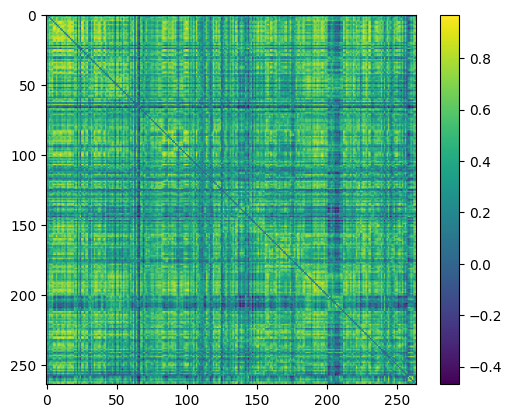

In [9]:
import matplotlib.pyplot as plt
import random

plt.imshow(remap(vec2mat(ps[random.choice(list(ps.keys()))])))
plt.colorbar()
plt.show()

In [10]:
# Read the phenotype info

import pandas as pd

csvname = '/run/media/anton/AntonData1/UKB_MRI_data_11092022/UKB_Phenotypes/project3_Anton/DataSet_11162022.csv'
df = pd.read_csv(csvname)
df

,f.eid,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.21022.0.0,f.22001.0.0,f.25750.2.0,f.25750.3.0,f.25751.2.0,f.25751.3.0,f.25752.2.0,f.25752.3.0,f.25753.2.0,f.25753.3.0,f.25754.2.0,f.25754.3.0,f.25755.2.0,f.25755.3.0
0,1000010,50.0,NaN,NaN,NaN,50.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000028,52.0,NaN,NaN,NaN,52.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000034,56.0,NaN,NaN,NaN,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000045,43.0,NaN,NaN,NaN,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000052,61.0,NaN,NaN,NaN,61.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502481,6024820,68.0,NaN,NaN,NaN,68.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502482,6024833,61.0,NaN,NaN,NaN,61.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502483,6024847,64.0,NaN,NaN,NaN,64.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502484,6024859,60.0,NaN,NaN,NaN,60.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
subs = list(ps.keys())
ages = []
x = []
for i,s in enumerate(subs):
    x.append(ps[s])
    ages.append(float(df[df['f.eid'] == s]['f.21003.2.0']))
    if i % 100 == 0:
        print(f'Done {i}')
x = np.stack(x)
ages = np.array(ages)

print(x.shape, ages.shape)

Done 0
Done 100
Done 200
Done 300
Done 400
Done 500
Done 600
Done 700
Done 800
Done 900
Done 1000
Done 1100
Done 1200
Done 1300
Done 1400
Done 1500
Done 1600
Done 1700
Done 1800
Done 1900
Done 2000
Done 2100
Done 2200
Done 2300
Done 2400
Done 2500
Done 2600
Done 2700
Done 2800
Done 2900
Done 3000
Done 3100
Done 3200
Done 3300
Done 3400
Done 3500
Done 3600
Done 3700
Done 3800
Done 3900
Done 4000
Done 4100
Done 4200
Done 4300
Done 4400
Done 4500
Done 4600
Done 4700
Done 4800
Done 4900
Done 5000
Done 5100
Done 5200
Done 5300
Done 5400
Done 5500
Done 5600
Done 5700
Done 5800
Done 5900
Done 6000
Done 6100
Done 6200
Done 6300
Done 6400
Done 6500
Done 6600
Done 6700
Done 6800
Done 6900
Done 7000
Done 7100
Done 7200
Done 7300
Done 7400
Done 7500
Done 7600
Done 7700
Done 7800
Done 7900
Done 8000
Done 8100
Done 8200
Done 8300
Done 8400
Done 8500
Done 8600
Done 8700
Done 8800
Done 8900
Done 9000
Done 9100
Done 9200
Done 9300
Done 9400
Done 9500
Done 9600
Done 9700
Done 9800
Done 9900
Done 10000
D

In [45]:
ages

array([55., 70., 66., ..., 73., 63., 57.])

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

def rmse(xhat, x):
    return np.mean((xhat-x)**2)**0.5

xtr, xt, ytr, yt = train_test_split(x, ages, train_size=0.8)

# mu = np.mean(ytr)
# yt = yt-mu
# ytr = ytr-mu

reg = Ridge(alpha=2000).fit(xtr, ytr)
yhat = reg.predict(xt)
print(rmse(yhat, yt))
print(rmse(np.mean(ytr), yt))

5.529047051083512
7.670527322390095
